### Week 4-6. 특수한 경우에 대한 코딩: Foward Euler 방법

우리는 $\ddot{x} + \omega ^2 x = 0$의 2계 미분 방정식을 풀기위해 $u=x$ and $v=x'=u'$ 의 관계를 설정하고 아래와 같이 새로운 두개의 1계 미분방정식을 만든다. 


$$u' = v, \qquad v' = -w^2 u.$$

여기에 Foward Euler 방법을 적용하면,
$$\frac{u^{n+1}-u^{n}}{\Delta t} = v^n,$$
$$\frac{v^{n+1}-v^{n}}{\Delta t} = -\omega^2 u^n, $$

아래의 방법과 같이 알고리즘을 정의할 수 있다.
$$u^{n+1}=u^{n}+\Delta t v^{n} , $$
$$v^{n+1}=v^{n}-\Delta t \omega^2 u^{n} , $$


480


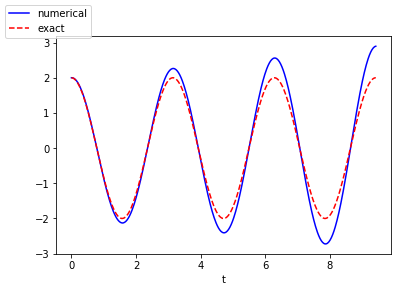

In [16]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega
dt = P/160      # P/40, P/160, P/2000 in textbook
T = 3*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
print (N_t)
u = zeros(N_t+1)
v = zeros(N_t+1)

# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0

# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n]

fig = plt.figure()
l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('t')
#plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

우리는 이미 풀려는 2계 미분방정식의 해, $u(t) = X_0 cos \omega t$를 알고 있기 때문에 적절한 정의역 $[0, T]$을 적용해서 정확한 해를 구하기 위해 얼마나 많은 포인트 들이 필요한지 유추해볼수 있다. 여기서 삼각함수의 주기는 $P = 2\pi/\omega$ 이다.


코드의 부분부분을 print out해보면서 Forward Euler 코드가 잘 짜졌는지 확인 해 볼수 있다. 이때  $ T = 3P$, $w = 2$, $\Delta t= P/20$ 으로 정의한다.


$\Delta t$가 작아질수록 결과는 더 정확해 짐을 알 수 있다. eg. $\Delta t = P/40, P/160, P/2000$.


Forward Euler 방법은 충분한 grid가 확보되어야 정확한 계산이 된다.
